# Atticus Soane
# Conjugate Gradient/Steepest Descent Algorithms

# Problem 1
Prove that for the steepest descent method consecutive directions are orthogonal, i.e. $\langle \upsilon ^{(k+1)}, \upsilon ^{(k)} \rangle = 0$

To prove that $\langle \upsilon^{(k+1)}, \upsilon^{(k)} \rangle = 0$, we will begin by noting that for the steepest descent method, the following relations are all true: $$(1)\:\:\upsilon^{(k)}\: = \: -\nabla J(x^{(k)}) = r^{(k)}$$ $$(2)\:\:x^{(k+1)} = x^{(k)} + t_{k}\upsilon{(k)}$$ $$(3)\:\:\langle x,y \rangle = x^{T}y = \displaystyle\sum_{i=1}^{n}x_{i}y_{i}$$ $$(4)\:\:r^{(k+1)} = r^{(k)} - t_{k}Ar^{(k)}$$ $$(5)\:\:t_{k} = \frac{\langle r^{(k)}, r^{(k)} \rangle}{\langle r^{(k)}, Ar^{(k)} \rangle}$$where $\upsilon^{(k)}$ is the search direction vector, $t_{k}$ is the step length (a scalar), $r^{(k)}$ is the remainder $b-Ax^{(k)}$, and $J(x)$ is the objective function. 

Thus using (1) and (4), we can write $\langle \upsilon^{(k+1)}, \upsilon^{(k)} \rangle$ as: $$\langle \upsilon^{(k+1)}, \upsilon^{(k)} \rangle\:=\:\langle r^{(k+1)}, r^{(k)} \rangle\:=\: \langle r^{(k)} - t_{k}Ar^{(k)}, r^{(k)} \rangle $$ Using (3) and (5), we can write this as: $$[r^{(k)} - \frac{\langle r^{(k)}, r^{(k)} \rangle}{\langle r^{(k)}, Ar^{(k)} \rangle}Ar^{(k)}]^{T}r^{(k)}\:=\:[r^{(k)} - \frac{r^{(k)T}r^{(k)}}{r^{(k)T}Ar^{(k)}}Ar^{(k)}]^{T}r^{(k)}$$ Cancelling the $r^{(k)T}$ and the $Ar^{(k)}$ from the top and the bottom, we are left with: $$[r^{(k)} - r^{(k)}]^{T}r^{(k)} = 0^{T}r^{(k)} = 0$$ and thus we have proved that $\langle \upsilon^{(k+1)}, \upsilon^{(k)} \rangle$ is equal to $0$ and therefore orthogonal. 

# Problem 2
In the conjugate gradient method prove that if $\upsilon^{(k)} = 0$ for some $k$, then $Ax^{(k)} = b$

As $r^{(k+1)} = r^{(k)} - A\upsilon^{(k)}$, we can write this as $A\upsilon^{(k)} = r^{(k)} - r^{(k+1)}$. Thus, if $\upsilon^{(k)} = 0$, then $A\upsilon^{(k)} = 0$, and thus $$0 = r^{(k)} - r^{(k+1)} \implies r^{(k)} = r^{(k+1)}$$ As is stated in Theorem 37 of the notes, $\langle r^{(i)}, r^{(j)} \rangle = 0, i\neq j$, and thus: $$r^{(k+1)} = r^{(k)} \implies r^{(k+1)} = r^{(k)} = 0$$ As we know $r^{(k)} = b - Ax^{(k)}$, we know that: $$0 = b - Ax^{(k)} \implies Ax^{(k)} = b$$ and thus it is proved. 

# Problem 3
Implement the conjugate gradient algorithm. 

In [29]:
#this code was written by Atticus Soane to implement the conjugate gradient algorithm. It's annotated as I go.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#this function is designed to calculate inner products. The input it takes is vectors (since they are (n x 1) matrices
#,they are inputted as arrays) and returns a floating point number that will act as a scalar
def innerProduct(x, y):
    n = len(x)
    prod = 0 #acts as the accumulator
    for i in range(n): #performs the inner product calculation
        prod += x[i] * y[i]
    return(prod)
#this function generates the (A*upsilon) matrix multiplication without actually performing the matrix multiplication.
#because A is tridiagonal and therefore there are only as select number of non-zero values, we only need to worry
#about 3 consecutive terms. The input is an array of upsilon values, and the output is a list of A*upsilon values
def A_ups(ups):
    n = len(ups)
    h = 1/n #sets the h-value
    a = (2/h**2) + (np.pi)**2 #calculates the values to be used on each diagonal 
    b = (-1/h**2)
    c = (-1/h**2)
    a_ups = []
    a_ups.append(a*ups[0] + b*ups[1]) #becaue the first row of A only has two values, the first row is separate
    for i in range(1, n-1): #calculate the values for rows 2 through n-1
        a_ups.append(b*ups[i-1] + a*ups[i] + c*ups[i+1])
    a_ups.append(c*ups[-2] + a*ups[-1]) #similar to the reason above, the last row is left out of the for loop
    return(a_ups)

#this code implements the conjugate gradient algorithm as is seen in the notes. The inputs taken are a value for n,
#the number of nodes, and TOL which is the desired tolerance of remainder. The ouput is an array, 
# which is the k-th iteration of the algorithm's approximation of the value of the vector x. 

def conjGrad(n, TOL):
    nodes = np.linspace(0, 1, n+1) #generates a list of equispaced nodes 
    b = []
    l = len(nodes)
    for j in range(1, l-1): #generates the list to be used as the b-matrix, leaving out n=0 and n=N.
        b.append(2*(np.pi**2)*np.sin(np.pi *nodes[j]))
    b = np.array(b) #turns that list into an array to simplify the calculations below
    x = np.array([0] * len(b)) #generates the estimate for x0
    r = b #because r0 = b - Ax0 and x0=0, Ax=0 and thus b-Ax0 = b, so r0 just equals b0
    ups = r #establishes a value for upsilon 
    r_2 = innerProduct(r, r) ** 0.5 #this is the value for the 2-norm of r that will be checked against our tolerance
    k = 0 #counts our iterations
    while r_2 > TOL:
        a_ups = np.array(A_ups(ups))
        rk_prod = innerProduct(r, r) #saves the value for rk to be used in the calculation of s
        t = rk_prod/ innerProduct(ups, a_ups)  #generates the t_k value
        x = x + (t*ups) #generates the x_k+1 value
        r = r - (t*a_ups) #generates the r_k+1 value
        s = innerProduct(r, r)/rk_prod #generates s using the two inner products of r_k+1 and r_k
        ups = r + (s*ups) #generates upsilon_k+1
        k += 1
        r_2 = innerProduct(r, r)**0.5 #checks the tolerance
    x = np.insert(x, 0, 0) #adds back n=0 and n=N to complete the boundary value problem 
    x = np.append(x, 0)
    print("The number of iterations used was " +str(k)) #prints the iterations of the alogirthm.
    return(x)

## In order to comment on the number of iterations and the convergence of those iterations, I have used three different tolerances: $10^{-4},10^{-10}$ and $10^{-16}$. The number of iterations will be printed below the code cell. I will also calculate the error bound for the approximation generated using each different tolerance level and comment on that, as well as plotting all three approximations next to the actual function. My comments will be below all of the plots and code cells. 

## N =50

The number of iterations used was 1
The number of iterations used was 1
The number of iterations used was 50
The maximum error was 0.02036439034094273
The maximum error was 0.02036439034094273
The maximum error was 0.02036439034094273


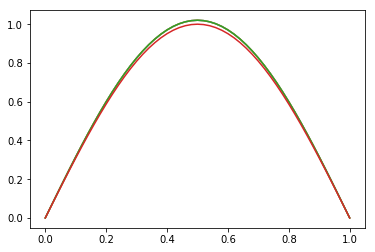

In [30]:
#generates different approximations for three different tolerance levels 
x1_4 = conjGrad(50, 10**-4)
x1_10 = conjGrad(50, 10**-10)
x1_16 = conjGrad(50, 10**-16)
#generates the actual values of the function
nodes = np.linspace(0, 1, 51)
y = np.sin(np.pi * nodes)
#plots all four of the approximations and the real function on the same plot
plt.plot(nodes, x1_4)
plt.plot(nodes, x1_10)
plt.plot(nodes, x1_16)
plt.plot(nodes, y)
#calculates the error 
error1 = abs(y - x1_4)
max_error1 = max(error1)
print("The maximum error was "+str(max_error1))

error1 = abs(y - x1_10)
max_error1 = max(error1)
print("The maximum error was "+str(max_error1))

error1 = abs(y - x1_16)
max_error1 = max(error1)
print("The maximum error was "+str(max_error1))


## N = 100:

The number of iterations used was 1
The number of iterations used was 1
The number of iterations used was 99
The maximum error was 0.010091116994114246
The maximum error was 0.010091116994114246
The maximum error was 0.010091116994116023


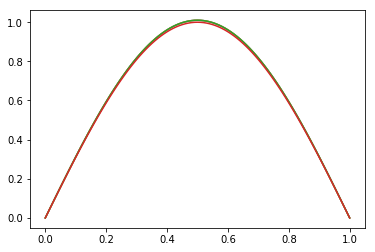

In [31]:
#generates approximations using the three different tolerance levels
x2_4 = conjGrad(100, 10**-4)
x2_10 = conjGrad(100, 10**-10)
x2_16 = conjGrad(100, 10**-16)
#generates the actual values of the functions
nodes = np.linspace(0, 1, 101)
y2 = np.sin(np.pi * nodes)
#plots all four on the same plot
plt.plot(nodes, x2_4)
plt.plot(nodes, x2_10)
plt.plot(nodes, x2_16)
plt.plot(nodes, y2)
#calculates the error at each different tolerance level
error2 = abs(y2 - x2_4)
max_error2 = max(error2)
print("The maximum error was "+str(max_error2))

error2 = abs(y2 - x2_10)
max_error2 = max(error2)
print("The maximum error was "+str(max_error2))

error2 = abs(y2 - x2_16)
max_error2 = max(error2)
print("The maximum error was "+str(max_error2))

## N = 200:

The number of iterations used was 1
The number of iterations used was 2
The number of iterations used was 200
The maximum error was 0.005022780443347363
The maximum error was 0.005022780443347363
The maximum error was 0.005022780443339592


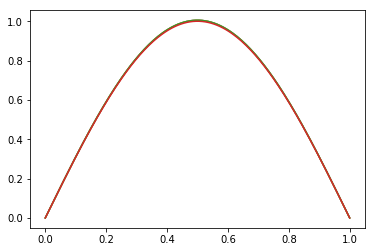

In [32]:
#generates approximations for the three different tolerance levels 
x3_4 = conjGrad(200, 10**-4)
x3_10 = conjGrad(200, 10**-10)
x3_16 = conjGrad(200, 10**-16)
#generates the actual values of the function
nodes = np.linspace(0, 1, 201)
y3 = np.sin(np.pi * nodes)
#plots all four functions on the same graph
plt.plot(nodes, x3_4)
plt.plot(nodes, x3_10)
plt.plot(nodes, x3_16)
plt.plot(nodes, y3)
#calculates the various errors for each different tolerance levels
error3 = abs(y3 - x3_4)
max_error3 = max(error3)
print("The maximum error was "+str(max_error3))

error3 = abs(y3 - x3_10)
max_error3 = max(error3)
print("The maximum error was "+str(max_error3))

error3 = abs(y3 - x3_16)
max_error3 = max(error3)
print("The maximum error was "+str(max_error3))

The results are interesting. Even when the lower bound for $||r^{(k)}||_{2}$, the tolerance, is set as low as $10^{-10}$, for $n = 50$ and $n = 100$, the algorithm only required one iteration, and two iterations were required when $n = 200$. What's even more interesting is that the maximum error bound virtually does not change (for $10^{-16}$, the $10th$ digit does change) regardless of what the tolerance is set at, and the graphs of the approximations at all three tolerance levels appears to be identical. The error does lower linearly from $n=50$ to $n=100$ to $n=200$, as it is halved each time. However, even when the tolerance is set to machine precision, $10^{-16}$, the error bound is not insignificant. The minimum error bound achieved was at $n=200$, but even this error was roughly $.005$. This seems to contradict Theorem 38 in the notes, which states that the algorithm converges to the exact solution in at most $n$ steps. My thought on this is that the Theorem does have one stipulation, that round-off erros could present a problem, and so my thought must be that there are some round-off errors somewhere in this process. Regardless, the error bound that is achieved from the Conjugate Gradient Algorithm even after only 1 iteration is far superior than the performance of the Jacobian or Gauss-Seidel algorithms. They are really not even comparable.  